# K-means clustering

## Exploratory data analysis: mall customer segmentation data (kaggle)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df1 = pd.read_csv("The Muggle Sorting Hat DataSet.csv")
df1["Gender"] = df1["Gender"].str.replace(" ", "")
df1["District"] = df1["District"].str.replace(" ", "")
df1["Name"] = df1["Name"].str.replace(" ", "")
df1["Friend 1"] = df1["Friend 1"].str.replace(" ", "")
df1["Friend 2 "] = df1["Friend 2 "].str.replace(" ", "")
df1.rename(columns = {"Friend 2 ":"Friend 2"}, inplace = True)
df1.head()

,Name,Gender,Age,District,Friend 1,Friend 2
0,BettyAllison,female,10,Pandora,MollyMeer,JessicaZebra
1,PeterAlexs,male,10,Limsa,G�ntherCohl,CeasarFeige
2,GregorAllmann,male,11,Pandora,BertEdamer,CeasarFeige
3,TiffanyBecks,female,10,Pandora,AllyInka,SallyBrot
4,SallyBrot,female,10,Limsa,TiffanyBecks,BettyAllison


In [2]:
#df1.rename(columns = {"Annual Income (k$)":"Income", "Spending Score (1-100)":"Spending Score"}, inplace = True)
#df1.head()

In [3]:
df1.describe()

,Age
count,80.000000
mean,10.112500
std,0.317974
min,10.000000
25%,10.000000
50%,10.000000
75%,10.000000
max,11.000000


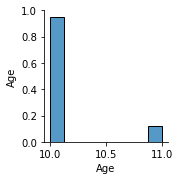

In [4]:
sns.pairplot(df1[["Age", "District", "Gender"]])

In [6]:
df1["District"].value_counts()

Pandora       19
Uldah         17
Limsa         15
Queensdale    11
Gridania      11
Reach          7
Name: District, dtype: int64

In [7]:
dic = {"Pandora" : "0", "Uldah" : "1", "Limsa" : "2", "Queensdale" : "3", "Gridania" : "4", "Reach" : "5"}
dic2 = {"female" : "0", "male" : "1"}

for old, new in dic.items():
    df1['District'] = df1['District'].str.replace(old, new, regex=False)

for old, new in dic2.items():
    df1['Gender'] = df1['Gender'].str.replace(old, new, regex=False)

df1['District'] = df1['District'].astype(int)
df1['Gender'] = df1['Gender'].astype(int)

In [8]:
df1.head()
df1["Gender"].value_counts()

1    41
0    39
Name: Gender, dtype: int64

## Clustering mall customer segmentation data

In [9]:
import sklearn.cluster as cluster
kmeans = cluster.KMeans(n_clusters = 5, init = "k-means++", random_state = 42)
kmeans = kmeans.fit(df1[["District", "Gender"]])
kmeans.cluster_centers_

array([[ 7.72727273e-01,  7.27272727e-01],
       [ 4.38888889e+00,  5.55555556e-01],
       [ 2.33333333e+00,  1.00000000e+00],
       [-2.22044605e-16, -1.11022302e-16],
       [ 2.54545455e+00, -1.11022302e-16]])

In [10]:
df1["Clusters"] = kmeans.labels_
df1.head(10)

,Name,Gender,Age,District,Friend 1,Friend 2,Clusters
0,BettyAllison,0,10,0,MollyMeer,JessicaZebra,3
1,PeterAlexs,1,10,2,G�ntherCohl,CeasarFeige,2
2,GregorAllmann,1,11,0,BertEdamer,CeasarFeige,0
3,TiffanyBecks,0,10,0,AllyInka,SallyBrot,3
4,SallyBrot,0,10,2,TiffanyBecks,BettyAllison,4
5,NancyClick,0,11,1,ZoeJutter,AmandaFredericks,0
6,G�ntherCohl,1,10,1,CeasarFeige,PeterAlexs,0
7,JohnnyCedar,1,10,4,MarvinGeige,LeoJackson,1
8,MathildaDamm,0,10,2,YuleHoffnung,ZoeJutter,4
9,BertEdamer,1,10,1,PeterAlexs,G�ntherCohl,0


In [11]:
df1["Clusters"].value_counts()

0    22
1    18
2    15
3    14
4    11
Name: Clusters, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='District'>

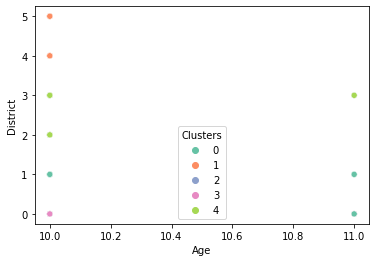

In [12]:
sns.scatterplot(data = df1, x = "Age", y = "District", hue = "Clusters", palette = "Set2")

## Creating diverse customer groups

In [13]:
"""
First function creates list a of clustered dataframes (one df per cluster); second function takes list a,
splits clustered dataframes into required number of diverse groups (splits) and adds them to list b; third function 
combines splitted dataframes in list b into new (diverse) dataframes and adds them to list c.
"""
from functools import reduce

def create_clustered_dataframes(df):
    dataframes = []
    for i in df.Clusters.unique():
        temporary_df = df[df["Clusters"] == i]
        dataframes.append(temporary_df)
    return dataframes

clustered_dataframes = create_clustered_dataframes(df1)
clustered_dataframes[0]


,Name,Gender,Age,District,Friend 1,Friend 2,Clusters
0,BettyAllison,0,10,0,MollyMeer,JessicaZebra,3
3,TiffanyBecks,0,10,0,AllyInka,SallyBrot,3
10,AmandaFredericks,0,11,0,NancyClick,TiffanyBecks,3
18,SteffieHorcrux,0,10,0,FrederikeGaal,ShirleyTemple,3
19,YuleHoffnung,0,10,0,ZoeJutter,AmandaFredericks,3
22,ZoeJutter,0,10,0,YuleHoffnung,SallyBrot,3
38,MollyMeer,0,11,0,MillyMucks,BettyAllison,3
40,MillyMucks,0,10,0,KatrinGreat,SandraNox,3
44,AlexaNymm,0,10,0,StacyNymm,VeraNyoa,3
45,StacyNymm,0,11,0,SteffieHorcrux,MathildaDamm,3


In [14]:
def split_dataframes(clustered_list, splits):
    dataframes_split = []
    for i in clustered_list: 
        index_to_split = (-(-len(i)//splits))
        start = 0
        end = index_to_split
        for split in range(splits):
            temporary_df = i.iloc[start:end, :]
            dataframes_split.append(temporary_df)
            start += index_to_split
            end += index_to_split
    return dataframes_split

split_clustered_dataframes = split_dataframes(clustered_dataframes, 4)
split_clustered_dataframes[0]

,Name,Gender,Age,District,Friend 1,Friend 2,Clusters
0,BettyAllison,0,10,0,MollyMeer,JessicaZebra,3
3,TiffanyBecks,0,10,0,AllyInka,SallyBrot,3
10,AmandaFredericks,0,11,0,NancyClick,TiffanyBecks,3
18,SteffieHorcrux,0,10,0,FrederikeGaal,ShirleyTemple,3


In [15]:
"""
Splits in split_dataframes_by_position has to be the same as splits in create_diverse_dataframes!
"""

def create_diverse_dataframes(split_list, splits):
    dataframes_diverse = []
    start = 0
    for split in range(splits):        
        if start <= splits - 1:
            new_dataframe_as_list = split_list[start::splits]
            new_dataframe = pd.concat(new_dataframe_as_list)
            dataframes_diverse.append(new_dataframe)
            start += 1
    return dataframes_diverse    
    
diverse_groups = create_diverse_dataframes(split_clustered_dataframes, 5)
diverse_groups[0].head(15)

,Name,Gender,Age,District,Friend 1,Friend 2,Clusters
0,BettyAllison,0,10,0,MollyMeer,JessicaZebra,3
3,TiffanyBecks,0,10,0,AllyInka,SallyBrot,3
10,AmandaFredericks,0,11,0,NancyClick,TiffanyBecks,3
18,SteffieHorcrux,0,10,0,FrederikeGaal,ShirleyTemple,3
25,HankKalt,1,10,3,BasOffen,ColeMaas,2
26,MaxKaal,1,11,3,AlexanderOdele,BillyNozzle,2
27,TrevorKehl,1,10,2,HankKalt,ColeMaas,2
35,ColeMaas,1,10,3,CarlosVives,BasOffen,2
36,ErnestoMadrigal,1,10,1,XanderMadrigal,KevinNicks,0
37,XanderMadrigal,1,10,1,ErnestoMadrigal,BillyNozzle,0


## Visualising diverse groups

In [16]:
group = diverse_groups[0]
#sns.scatterplot(data = group, x = "Income", y = "Spending Score", hue = "Clusters", palette = "Set2")

In [17]:
for group_temp in diverse_groups:
    print(group_temp["Clusters"].value_counts())
    print(len(group_temp))

0    6
2    4
3    4
4    2
Name: Clusters, dtype: int64
16
1    5
0    4
2    4
3    4
Name: Clusters, dtype: int64
17
1    5
3    4
2    3
4    3
Name: Clusters, dtype: int64
15
0    6
1    5
4    3
3    2
Name: Clusters, dtype: int64
16
0    6
2    4
1    3
4    3
Name: Clusters, dtype: int64
16


Problem: Groups are too different in size!

## Creating diverse customer groups (different approach)

In [18]:
def sort_dataframe(df):
    df["Clusters"] = pd.Categorical(df["Clusters"], [0, 1, 2, 3, 4])
    sorted_dataframe = df.sort_values("Clusters")
    return sorted_dataframe

sort_dataframe(df1).head()

,Name,Gender,Age,District,Friend 1,Friend 2,Clusters
62,IndiPyrre,1,10,0,ArnoKrys,DavePulps,0
37,XanderMadrigal,1,10,1,ErnestoMadrigal,BillyNozzle,0
36,ErnestoMadrigal,1,10,1,XanderMadrigal,KevinNicks,0
34,BibiLydda,0,11,1,MaxieLooks,CiciLydda,0
33,CiciLydda,0,10,1,BibiLydda,MaxieLooks,0


## Keeping two customers together: merging rows before clustering
    

In [19]:
df2 = df1.drop("Clusters", axis=1)

def merge_customers1(df, id1, id2):
    customer1 = df[df["CustomerID"] == id1]
    customer2 = df[df["CustomerID"] == id2]
    customer_id = [customer1.iloc[0,0], customer2.iloc[0,0]]
    average_age = (customer1.iloc[0,2] + customer2.iloc[0,2])/2
    average_income = (customer1.iloc[0,3] + customer2.iloc[0,3])/2
    average_spending_score = (customer1.iloc[0,4] + customer2.iloc[0,4])/2
    gender = [customer1.iloc[0,1], customer2.iloc[0,1]]
    merged_c = pd.DataFrame({"CustomerID": [customer_id],
                                      "Gender": [gender],
                                      "Age": [average_age],
                                      "Income": [average_income],
                                      "Spending Score": [average_spending_score]})
    return merged_c


#merge_customers1(df2, 1, 2)

In [20]:
def merge_customers2(df, id1, id2):
    customer1 = df[df["CustomerID"] == id1]
    customer2 = df[df["CustomerID"] == id2]
    customer_id = [customer1.iloc[0,0], customer2.iloc[0,0]]
    age = [customer1.iloc[0,2], customer2.iloc[0,2]]
    income = [customer1.iloc[0,3], customer2.iloc[0,3]]
    spending_score = [customer1.iloc[0,4], customer2.iloc[0,4]]
    gender = [customer1.iloc[0,1], customer2.iloc[0,1]]
    merged_c = pd.DataFrame({"CustomerID": [customer_id],
                                      "Gender": [gender],
                                      "Age": [age],
                                      "Income": [income],
                                      "Spending Score": [spending_score]})
    return merged_c


#merge_customers2(df2, 1, 200)

In [21]:
df4 = pd.DataFrame()
#for number in range(1, 101):
    #df_temp = df4.append(merge_customers1(df2, number, 100+number))
    #df4 = df_temp
print(df4)
print(len(df4))

Empty DataFrame
Columns: []
Index: []
0


In [22]:
#sns.pairplot(df4[["Age", "Income", "Spending Score"]])

## Clustering students based on network communities

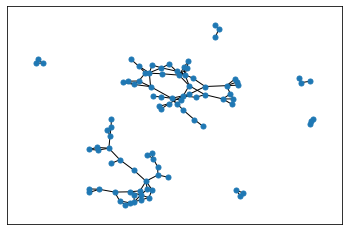

In [23]:
import networkx as nx

G_symmetric = nx.Graph()

for index, row in df1.iterrows():
    G_symmetric.add_edge(row["Name"], row["Friend 1"])
    G_symmetric.add_edge(row["Name"], row["Friend 2"])

nx.spring_layout(G_symmetric)
nx.draw_networkx(G_symmetric, node_size = 25, with_labels = False)

The following bit of code allows us to extract clusters/communities of people:

In [38]:
from networkx.algorithms.community import greedy_modularity_communities

c = list(greedy_modularity_communities(G_symmetric, resolution = 2))

sorted(c[7])

['AlexanderOdele',
 'MaxKaal',
 'NewtScamander',
 'RyanPillmann',
 'SteveQuarter',
 'WolterPlop']

In [32]:
def merge_students(df, list_sets):
    list_df = []
    for set_students in list_sets:
        mask = df["Name"].isin(set_students)
        df_set = df.loc[mask]
        temp_df = pd.DataFrame({"Name": [set_students],
                                "Number of Students": [len(set_students)],
                                "Gender": [round(df_set["Gender"].mean(), 1)],
                                "Age": [round(df_set["Age"].mean(), 1)],
                                "District": [round(df_set["District"].mean(), 1)]})
        list_df.append(temp_df)
    merged_communities = pd.concat(list_df, ignore_index=True)
    return merged_communities
        
df_merged_students = merge_students(df1, c)
df_merged_students


,Name,Number of Students,Gender,Age,District
0,"(LisaSanta, NancyClick, YuleHoffnung, Mathilda...",11,0.0,10.3,0.8
1,"(ColeMaas, BobRekon, BasOffen, PhilRookie, Car...",9,1.0,10.0,2.8
2,"(BillyNozzle, ZackMolen, XanderMadrigal, Kevin...",9,1.0,10.0,1.6
3,"(VivianKratz, BettyOlive, AmoraPeer, AnnaKrull...",8,0.0,10.1,2.1
4,"(PeterAlexs, G�ntherCohl, GregorAllmann, MaxJo...",6,1.0,10.2,1.3
5,"(BobTamer, MarvinGeige, JohnnyCedar, FrankTake...",6,1.0,10.0,4.0
6,"(BettyAllison, KatrinGreat, JessicaZebra, Sand...",6,0.0,10.2,1.0
7,"(SteveQuarter, RyanPillmann, NewtScamander, Al...",6,1.0,10.2,2.5
8,"(SallyBrot, Pillow, GeorgiaPammen, TiffanyBeck...",6,0.0,10.0,1.4
9,"(AdamPeggie, StingPallen, SanderPendeln, Brent...",5,1.0,10.0,1.8


## k-means clustering of student groups

In [33]:
kmeans = cluster.KMeans(n_clusters = 8, init = "k-means++", random_state = 42)
kmeans = kmeans.fit(df_merged_students[["District", "Gender"]])
kmeans.cluster_centers_

array([[4.5       , 0.        ],
       [1.56666667, 1.        ],
       [2.05      , 0.        ],
       [1.05      , 0.        ],
       [4.        , 1.        ],
       [2.65      , 1.        ],
       [0.        , 1.        ],
       [3.        , 0.        ]])

In [42]:
df_merged_students["Clusters"] = kmeans.labels_
df_merged_students.head()

,Name,Number of Students,Gender,Age,District,Clusters
0,"(LisaSanta, NancyClick, YuleHoffnung, Mathilda...",11,0.0,10.3,0.8,3
1,"(ColeMaas, BobRekon, BasOffen, PhilRookie, Car...",9,1.0,10.0,2.8,5
2,"(BillyNozzle, ZackMolen, XanderMadrigal, Kevin...",9,1.0,10.0,1.6,1
3,"(VivianKratz, BettyOlive, AmoraPeer, AnnaKrull...",8,0.0,10.1,2.1,2
4,"(PeterAlexs, G�ntherCohl, GregorAllmann, MaxJo...",6,1.0,10.2,1.3,1


<AxesSubplot:xlabel='Gender', ylabel='District'>

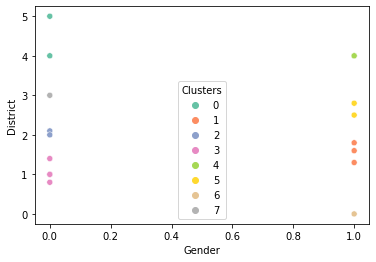

In [35]:
sns.scatterplot(data = df_merged_students, x = "Gender", y = "District", hue = "Clusters", palette = "Set2")

In [41]:
list_df_clustered_students = create_clustered_dataframes(df_merged_students)
list_df_clustered_students[2]

,Name,Number of Students,Gender,Age,District,Clusters
2,"(BillyNozzle, ZackMolen, XanderMadrigal, Kevin...",9,1.0,10.0,1.6,1
4,"(PeterAlexs, G�ntherCohl, GregorAllmann, MaxJo...",6,1.0,10.2,1.3,1
9,"(AdamPeggie, StingPallen, SanderPendeln, Brent...",5,1.0,10.0,1.8,1


In [31]:
import binpacking

b = {'a':10, 'b':10, 'c':11, 'd':1, 'e':2,'f':7}
bins = binpacking.to_constant_bin_number(b,4) # 4 being the bin number
print(bins)

[{'c': 11}, {'a': 10}, {'b': 10}, {'f': 7, 'e': 2, 'd': 1}]


In [32]:
b = list(b.values())
bins = binpacking.to_constant_volume(b,11) # 11 being the bin volume
print(bins)

[[11], [10, 1], [10], [7, 2]]
